In [1]:
import objgraph

# 函数对象和代码对象

每当定义一个函数之后，就得到一个 **函数对象**

In [2]:
def func():
    x = 1
    print("x =", x)

func

<function __main__.func()>

函数中的代码是保存在 **代码对象** 中的

In [3]:
func.__code__

<code object func at 0x0000019A3856F4B0, file "C:\Users\Frostbite\AppData\Local\Temp\ipykernel_240\358737138.py", line 1>

代码对象随着函数对象一起创建，是函数对象的一个重要属性。

代码对象中的重要属性以 `co——` 开头：

In [4]:
for attr in dir(func.__code__):
    if attr.startswith('co_'):
        print(attr, getattr(func.__code__, attr))

co_argcount 0
co_cellvars ()
co_code b'\x97\x00d\x01}\x00t\x01\x00\x00\x00\x00\x00\x00\x00\x00d\x02|\x00\xab\x02\x00\x00\x00\x00\x00\x00\x01\x00y\x00'
co_consts (None, 1, 'x =')
co_exceptiontable b''
co_filename C:\Users\Frostbite\AppData\Local\Temp\ipykernel_240\358737138.py
co_firstlineno 1
co_flags 3
co_freevars ()
co_kwonlyargcount 0
co_lines <built-in method co_lines of code object at 0x0000019A3856F4B0>
co_linetable b'\x80\x00\xd8\x08\t\x80A\xdc\x04\t\x88%\x90\x11\x85O'
co_lnotab b'\x02\x01\x04\x01'
co_name func
co_names ('print',)
co_nlocals 1
co_positions <built-in method co_positions of code object at 0x0000019A3856F4B0>
co_posonlyargcount 0
co_qualname func
co_stacksize 4
co_varnames ('x',)


C:\Users\Frostbite\AppData\Local\Temp\ipykernel_240\3368215030.py:3: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
  print(attr, getattr(func.__code__, attr))


# 函数运行帧

函数对象和代码对象保存了函数的基本信息，当函数运行的时候，还需要一个对象来保存运行时的状态。

这个对象就是 **帧对象**。

每一次调用函数，都会自动创建一个帧对象，记录当次运行的状态。

In [5]:
import inspect

In [13]:
def func():
    # 获取到函数的运行帧并返回
    return inspect.currentframe()

# 由于被变量所引用，因此帧不会被垃圾回收
f1 = func()
f1

<frame at 0x0000019A3861C5E0, file 'C:\\Users\\Frostbite\\AppData\\Local\\Temp\\ipykernel_240\\1741307380.py', line 3, code func>

In [14]:
f2 = func()
f2

<frame at 0x0000019A3861C360, file 'C:\\Users\\Frostbite\\AppData\\Local\\Temp\\ipykernel_240\\1741307380.py', line 3, code func>

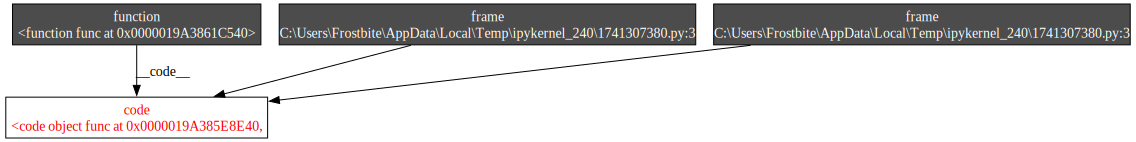

In [16]:
objgraph.show_backrefs(func.__code__, max_depth=1)

帧对象中的重要属性以 `f_` 开头:

- `f_code`: 执行的代码对象
- `f_back`: 指上一个帧，也就是调用者的帧
- `f_locals`: 局部变量
- `f_globals`: 全局变量
- `f_lineno`: 当前对应的行号

# 函数运行栈

当一个函数中调用了另一个函数，此时前一个函数还没有结束，所以这两个函数的顿对象是同时存在的。

比如，我们的程序一般都始于一个 `main` 函数，然后又调用其它函数，以此类推。

因此，一个程序的运行期，同时存在很多个顿对象，

函数之间的调用关系是 **先执行的后退出**，所以帧对象之间的关系也是先入后出，正好以栈的形式保存。

因此，函数的运行顿又称为栈顿。

注意：一个线程只有一个函数运行栈。

In [26]:
def func1():
    # 获取到函数的运行帧并返回
    return inspect.currentframe()

def bar():
    return func1()

f3 = bar()
f3

<frame at 0x0000019A38D1A0C0, file 'C:\\Users\\Frostbite\\AppData\\Local\\Temp\\ipykernel_240\\3519995230.py', line 3, code func1>

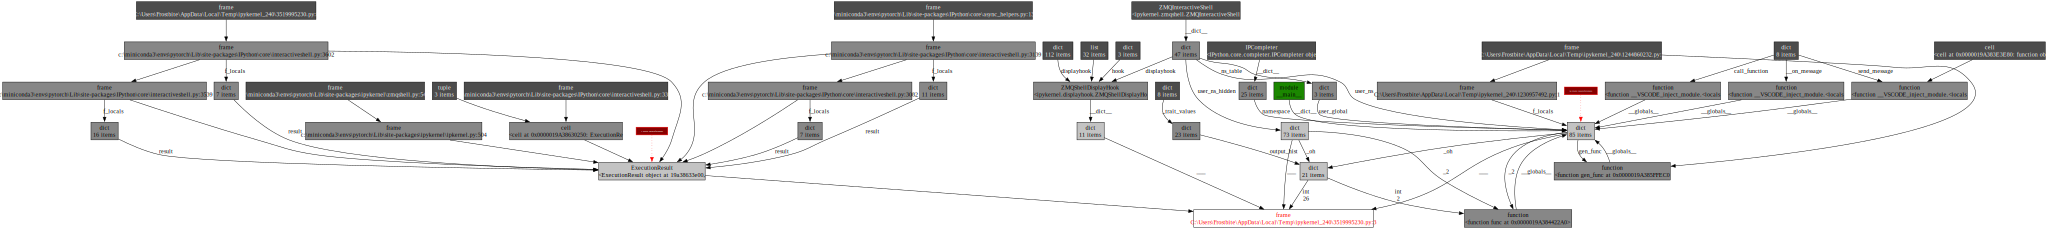

In [30]:
objgraph.show_backrefs(f3, max_depth=3)

# 生成器函数有何不同

生成器函数任然是函数对象，当然包括了代码对象。

调用生成器函数不会直接运行（也就是说，不像普通函数那样创建帧对象并且压入函数栈），而是得到一个生成器对象。



In [10]:
def gen_func():
    for _ in range(5):
        # 每次迭代都返回当前帧
        yield inspect.currentframe()

In [34]:
g1 = gen_func()
for i in g1:
    print(i)

<frame at 0x0000019A3863F7F0, file 'C:\\Users\\Frostbite\\AppData\\Local\\Temp\\ipykernel_240\\1244860232.py', line 4, code gen_func>
<frame at 0x0000019A3863F7F0, file 'C:\\Users\\Frostbite\\AppData\\Local\\Temp\\ipykernel_240\\1244860232.py', line 4, code gen_func>
<frame at 0x0000019A3863F7F0, file 'C:\\Users\\Frostbite\\AppData\\Local\\Temp\\ipykernel_240\\1244860232.py', line 4, code gen_func>
<frame at 0x0000019A3863F7F0, file 'C:\\Users\\Frostbite\\AppData\\Local\\Temp\\ipykernel_240\\1244860232.py', line 4, code gen_func>
<frame at 0x0000019A3863F7F0, file 'C:\\Users\\Frostbite\\AppData\\Local\\Temp\\ipykernel_240\\1244860232.py', line 4, code gen_func>


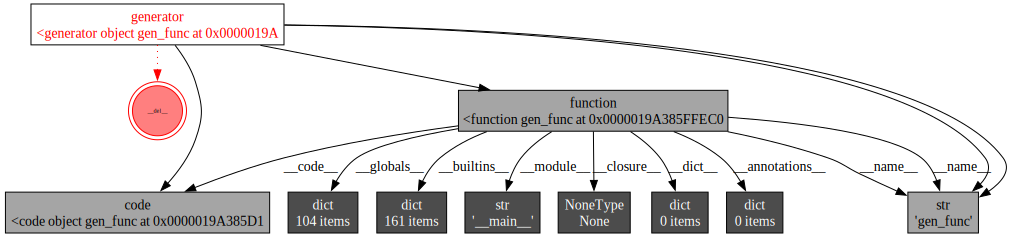

In [39]:
g2 = gen_func()
objgraph.show_refs(g2, max_depth=2)

当每次使用 `next()` 对生成器进行迭代是，都用这个帧对象（`gi_frame`）来保存状态:

In [41]:
# 展示生成器迭代过程中都是同一个 frame 对象

g3 = gen_func()

# 存为变量，不然迭代结束后属性会被清空
gi_frame = g3.gi_frame

# 保存所有迭代结果
frames = list(g3)

# 迭代结束后，gi_frame 属性被清空
print(g3.gi_frame) # None

# 所有的 frame 对象都是同一个对象
for frame in frames:
    print(frame is gi_frame)

None
True
True
True
True
True


生成器 frame 对象在暂停状态下看不到调用关系图

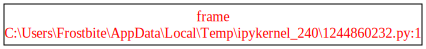

In [44]:
g4 = gen_func()

# f = next(g4)

objgraph.show_refs(g4.gi_frame)

在生成器运行过程中观察运行栈的关系图

In [49]:
def gen_frame_graph():
    for i in range(5):
        graph = objgraph.show_refs(inspect.currentframe())
        yield graph

gfg = gen_frame_graph()

In [50]:
# 定义2个函数方便观察栈的变化
def func_a(g):
    return next(g)

def func_b(g):
    return next(g)

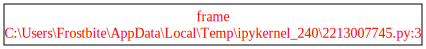

In [ ]:
func_a(gfg)

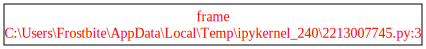

In [52]:
func_b(gfg)

综上，我们可以总结出：

- 生成器函数并不直接运行，而是借助于生成器对象来间接运行
- 创建生成器对象的同时创建了顿对象，并且由生成器对象保持引用
- 每次使用 `next()` 调用生成器时，就是将生成器引用的帧对象入栈
- 当 `next()` 返回时，也就是代码遇到 `yield`` 暂停的时候，就是将帧出栈·
- 直到迭代结束，顿最后一次出栈，并且被销毁

同步和异步普通函数：

同步函数

- 调用函数：构建帧对象并入栈
- 函数执行结束：顿对象出栈并销毁

生成器函数：
- 创建生成器：构建顿对象
- （多次）通过 `next` 触发执行：帧入栈
- （多次）遇到 `yield`：出栈（保留）
- 迭代结束：帧出栈并销毁

从生成器到协程

现在，我们可以更好地理解所谓的 `generator iterator` 是什么了：「生成器对象」是一个用来迭代执行「生成器函数」的迭代器

- 数据的迭代器：针对一个包含很多元素的数据集，逐个返回其中的元素
- 生成器迭代器：针对一个包含很多代码的函数，分段执行其中代码

让一个函数可以多次迭代运行其中的代码才是生成器对象最最根本的作用，而不仅是字面意思上的生成数据的东西。

迭代产出数据只是迭代执行代码的自然结果而已。

当用生成器来实现迭代器的时候，我们关注的是重点是：`yield <value>` 返回出来的数据。

如果把焦点集中到「被迭代执行的代码」上，就能对生成器有个全新的视角，那就是「协程」。